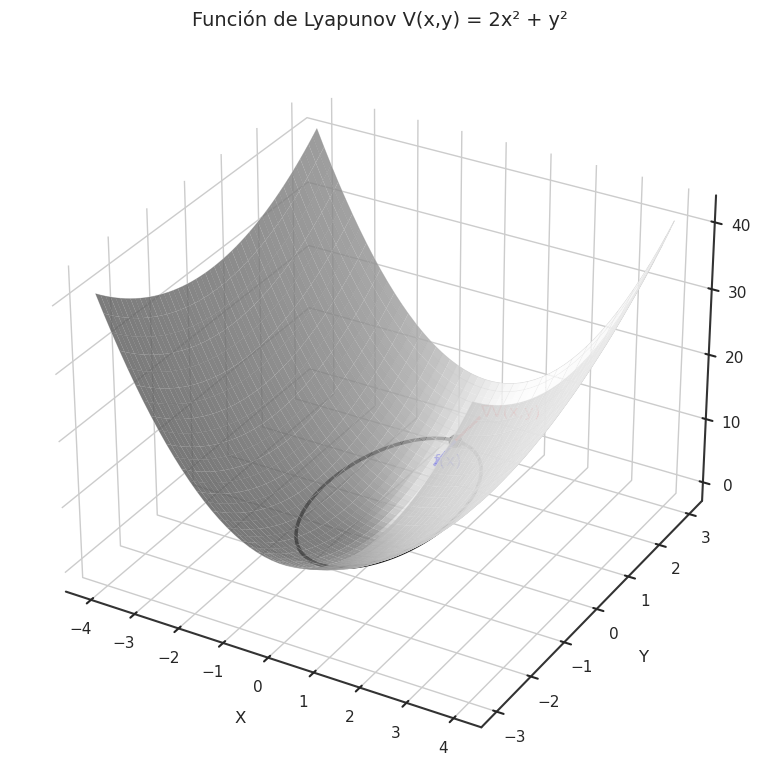

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Configurar figura
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Crear datos para la función de Lyapunov
x = np.linspace(-4, 4, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)

# Definir una función de Lyapunov cuadrática (elipses como curvas de nivel)
# V(x,y) = 2x^2 + y^2
V = 2 * X**2 + Y**2

# Elegir un valor específico para una curva de nivel
nivel_especifico = 4  # Este valor determinará el tamaño de la elipse

# Calcular puntos en la curva de nivel específica
t = np.linspace(0, 2*np.pi, 100)
x_elipse = np.sqrt(nivel_especifico/2) * np.cos(t)
y_elipse = np.sqrt(nivel_especifico) * np.sin(t)

# Elegir un punto en la curva de nivel (un punto en el primer cuadrante)
punto_idx = -28  # Índice arbitrario para seleccionar un punto
punto_x = x_elipse[punto_idx]
punto_y = y_elipse[punto_idx]
punto_z = nivel_especifico

# Calcular el gradiente de V en el punto seleccionado
# ∇V(x,y) = [4x, 2y]
grad_x = 4 * punto_x  # ∂V/∂x = 4x
grad_y = 2 * punto_y  # ∂V/∂y = 2y
grad_z = 0

# Normalizar el gradiente para mejor visualización
norm_factor = np.sqrt(grad_x**2 + grad_y**2)
grad_x_norm = grad_x / norm_factor * 0.8
grad_y_norm = grad_y / norm_factor * 0.8

# Crear un vector f(x) arbitrario que apunte hacia el interior
# Para apuntar hacia el interior, debe tener un producto escalar negativo con el gradiente
# Elegimos un vector que apunte ligeramente hacia el origen pero no exactamente
f_x = -punto_x * 0.8 + punto_y * 0.1
f_y = -punto_y * 0.8 - punto_x * 0.1
f_z = 0

# Normalizar f(x) para mejor visualización
norm_factor_f = np.sqrt(f_x**2 + f_y**2)
f_x_norm = f_x / norm_factor_f * 0.8
f_y_norm = f_y / norm_factor_f * 0.8

# Crear superficie con estilo de wireframe (grid) en gris claro
ax.plot_wireframe(X, Y, V, color='lightgray', linewidth=0.5, rstride=2, cstride=2)

# Superficie en color blanco con algo de transparencia
surf = ax.plot_surface(X, Y, V, color='white', alpha=0.1, linewidth=0, 
                       antialiased=True, shade=True)

# Marcar la curva de nivel en negro
ax.plot(x_elipse, y_elipse, [nivel_especifico] * len(x_elipse), 'k-', linewidth=2.5)

# Marcar el punto en la superficie 3D
ax.scatter([punto_x], [punto_y], [punto_z], color='black', s=80)

# Dibujar el vector gradiente (perpendicular a la curva de nivel)
ax.quiver(punto_x, punto_y, punto_z, grad_x_norm, grad_y_norm, grad_z, color='red', 
          linewidth=2, arrow_length_ratio=0.2, label='∇V(x,y)')

# Dibujar el vector f(x) (hacia el interior)
ax.quiver(punto_x, punto_y, punto_z, f_x_norm, f_y_norm, f_z, color='blue', 
          linewidth=2, arrow_length_ratio=0.2, label='f(x)')

# Agregar texto cerca de los vectores
ax.text(punto_x + grad_x_norm, punto_y + grad_y_norm, punto_z, '∇V(x,y)', color='red')
ax.text(punto_x + f_x_norm, punto_y + f_y_norm, punto_z, 'f(x)', color='blue')

ax.set_xlabel('X', fontsize=12, labelpad=10)
ax.set_ylabel('Y', fontsize=12, labelpad=10)
ax.set_zlabel('V(x,y)', fontsize=12, labelpad=10)
ax.set_title('Función de Lyapunov V(x,y) = 2x² + y²', fontsize=14)

# Ajustar los ángulos de vista para mejor visualización
ax.view_init(elev=30, azim=-60)

# Eliminar el color de los paneles de fondo para un aspecto más limpio
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Hacer que los paneles sean blancos o transparentes
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')

# Configurar el estilo de la malla de los ejes en gris claro
ax.grid(True, linestyle='-', linewidth=0.5, color='lightgray')

plt.tight_layout()
plt.show()

# Para guardar en formato SVG (editable en Inkscape)
# plt.savefig('lyapunov_function.svg', format='svg', dpi=300, bbox_inches='tight')